<a href="https://colab.research.google.com/github/blablamukul/colab_notebooks/blob/main/mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import cv2
import tensorflow_hub as hub
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Classroom		   mask_detector.model
'Colab Notebooks'	   mukul.jpg
 data			  'My Drive'
 example.jpeg		   Screenshot_2021-02-21-12-27-11-53.jpg
 IMG20210127141743~2.jpg   Shareddrives
 IMG_20210514_214238.jpg  'Trained Models'
 JEE			  'Untitled form.gform'
 mask_detector		   yolov4


In [ ]:
data_dir = "/content/gdrive/MyDrive/mask_detector"

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/gdrive/MyDrive/mask_detector')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

642


In [ ]:
mask = list(data_dir.glob('Mask/*'))
mask[:5]

[PosixPath('/content/gdrive/MyDrive/mask_detector/Mask/2085.jpg'),
 PosixPath('/content/gdrive/MyDrive/mask_detector/Mask/2086.jpg'),
 PosixPath('/content/gdrive/MyDrive/mask_detector/Mask/2083.jpg'),
 PosixPath('/content/gdrive/MyDrive/mask_detector/Mask/2070.jpg'),
 PosixPath('/content/gdrive/MyDrive/mask_detector/Mask/2072.jpg')]

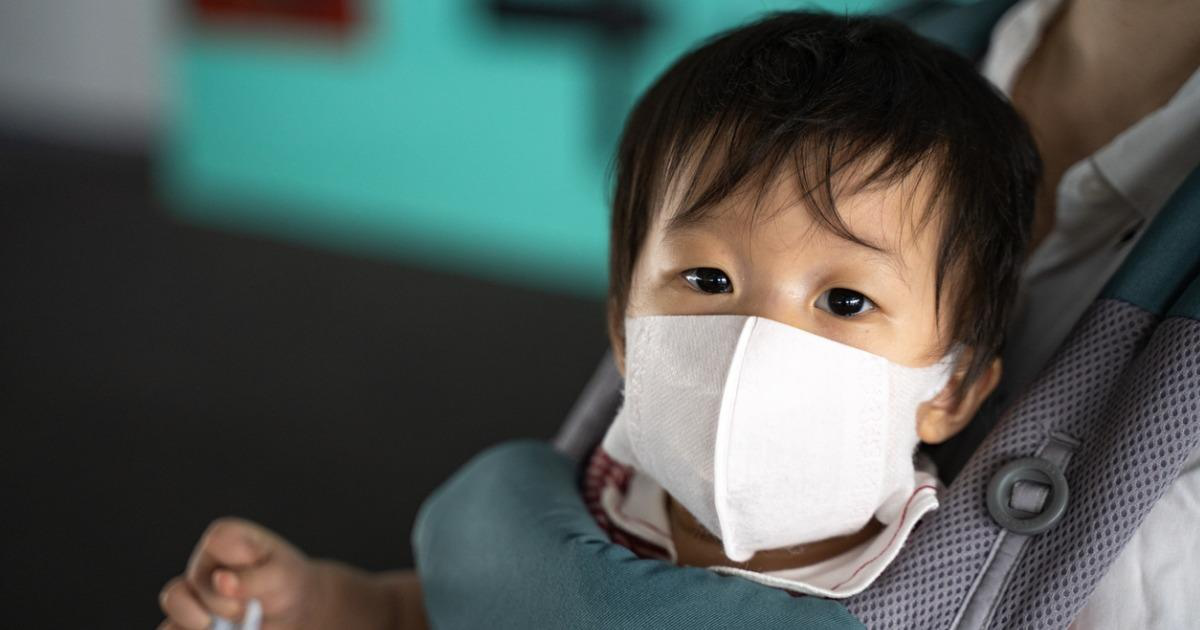

In [ ]:
PIL.Image.open(str(mask[0]))

In [ ]:
mask_data_dict = {
    'mask' : list(data_dir.glob('Mask/*')),
    'non_mask' : list(data_dir.glob('Non_Mask/*'))
}

In [ ]:
mask_labels_dict = {
    'mask' : 0,
    'non_mask' : 1
}

In [ ]:
img_array = cv2.imread(str(mask_data_dict['mask'][2]))
img_array.shape

(750, 750, 3)

In [ ]:
X,y = [], []

In [ ]:
for mask_name,images in mask_data_dict.items():
  for image in images:
    img_array = cv2.imread(str(image))
    img_array_resized = cv2.resize(img_array,(224,224))
    X.append(img_array_resized)
    y.append(mask_labels_dict[mask_name])

In [ ]:
len(X)

710

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 0)

In [ ]:
X_test_scaled = X_test/255
X_train_scaled = X_train/255

In [ ]:
X_train_scaled.shape

(532, 224, 224, 3)

In [ ]:
X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

In [ ]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 2, dtype = 'float32')
y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 2, dtype = 'float32')

In [ ]:
X_train_scaled.shape

(532, 224, 224, 3)

In [ ]:
model = keras.Sequential([
        keras.layers.Conv2D(16,(3,3), padding='same',activation = 'relu',input_shape=(224,224,3)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32,(3,3), padding='same',activation = 'relu'),
        keras.layers.MaxPooling2D(),
        #keras.layers.Conv2D(64,(3,3), padding='same',activation = 'relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(2, activation = 'sigmoid')])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs = 5)

Epoch 1/5
17/17 [==============================] - 31s 73ms/step - loss: 3.5264 - accuracy: 0.5282
Epoch 2/5
17/17 [==============================] - 1s 51ms/step - loss: 0.5023 - accuracy: 0.8008
Epoch 3/5
17/17 [==============================] - 1s 50ms/step - loss: 0.2844 - accuracy: 0.9023
Epoch 4/5
17/17 [==============================] - 1s 51ms/step - loss: 0.1813 - accuracy: 0.9417
Epoch 5/5
17/17 [==============================] - 1s 49ms/step - loss: 0.1463 - accuracy: 0.9398


In [ ]:
model.evaluate(X_test_scaled,y_test_categorical)

6/6 [==============================] - 0s 27ms/step - loss: 0.1322 - accuracy: 0.9438


[0.13223578035831451, 0.9438202381134033]

In [ ]:
model.save('/content/gdrive/MyDrive/Trained Models/mask_model.h5')

In [ ]:
classes = ["mask","non-mask"]

In [ ]:
def prediction(image):
    pred_array = cv2.imread(image)
    pred_array = np.array(pred_array)
    pred_array_resized = cv2.resize(pred_array,(224,224,))
    pred_array_scaled = np.array(pred_array_resized)/255
    pred_array_scaled = np.expand_dims(pred_array_scaled, axis=0)
    cv2_imshow(pred_array)
    print(classes[np.argmax(model.predict(pred_array_scaled))])
    #return pred_array_resized.shape

In [ ]:
prediction("/content/gdrive/MyDrive/mukul.jpg")

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dense_9 (Dense)              (None, 2)                